In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## CAPSTONE PROJECT Padi-Ku 
Rice Leaf Disease Detection using Convolutional Neural Network (Image Classification)

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential, load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
base_dir = "/content/drive/Shareddrives/Machine Learning/rice-leaf-desease"

2.5.0


In [2]:
batch_size = 32
img_height = 224
img_width = 224

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical"
  )

Found 16020 files belonging to 4 classes.
Using 12816 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical")

Found 16020 files belonging to 4 classes.
Using 3204 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Bacterial leaf blight', 'Brown spot', 'Health', 'Leaf smut']


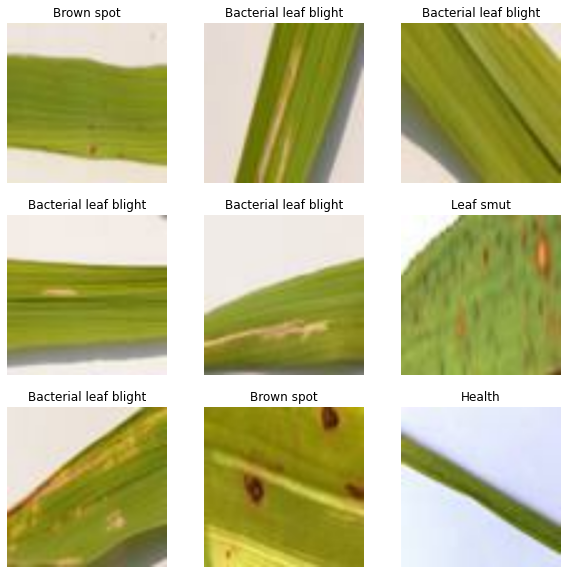

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)])

In [13]:
model = tf.keras.models.Sequential([
    data_aug,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),                                
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer = "he_uniform", padding = "valid", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', kernel_initializer = "he_uniform", padding = "same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(512, activation = "relu", kernel_initializer = "he_uniform"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax', kernel_initializer="glorot_uniform")
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 55, 55, 64)       

In [19]:
from keras.optimizers import Adam
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [20]:
initial_epochs = 10
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
401/401 [==============================] - 4336s 11s/step - loss: 0.6236 - accuracy: 0.7576 - val_loss: 0.3411 - val_accuracy: 0.8664
Epoch 2/10
401/401 [==============================] - 2234s 6s/step - loss: 0.2316 - accuracy: 0.9125 - val_loss: 0.0771 - val_accuracy: 0.9732
Epoch 3/10
401/401 [==============================] - 2210s 6s/step - loss: 0.1527 - accuracy: 0.9423 - val_loss: 0.0392 - val_accuracy: 0.9903
Epoch 4/10
401/401 [==============================] - 2225s 6s/step - loss: 0.1145 - accuracy: 0.9593 - val_loss: 0.0919 - val_accuracy: 0.9675
Epoch 5/10
401/401 [==============================] - 2247s 6s/step - loss: 0.0796 - accuracy: 0.9718 - val_loss: 0.0152 - val_accuracy: 0.9969
Epoch 6/10
401/401 [==============================] - 2245s 6s/step - loss: 0.0610 - accuracy: 0.9787 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 7/10
401/401 [==============================] - 2214s 6s/step - loss: 0.0481 - accuracy: 0.9820 - val_loss: 0.0134 - val_accuracy

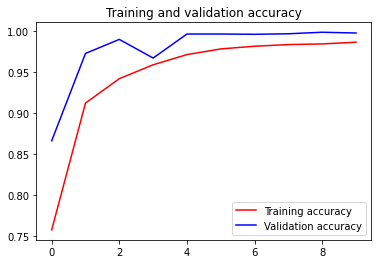

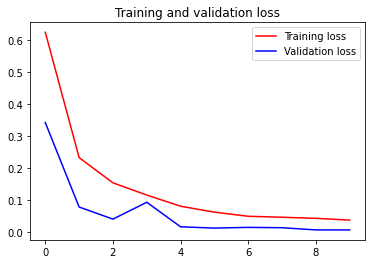

<Figure size 432x288 with 0 Axes>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [22]:
PADIKU_SAVED_MODEL = "padiku_saved_model"

In [23]:
tf.saved_model.save(model, PADIKU_SAVED_MODEL)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: padiku_saved_model/assets


In [24]:
model.save("padiku_v6.h5")

In [26]:
loss, accuracy = model.evaluate(val_ds)
print('Validation accuracy :', accuracy)

101/101 [==============================] - 133s 1s/step - loss: 0.0055 - accuracy: 0.9981
Validation accuracy : 0.9981273412704468


In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  print(classes)
  print("The photo is detected as {}, the score is {:.2f}".format(class_names[np.argmax(classes)], 100 * np.max(classes)))

Saving smut-_0_368.jpg to smut-_0_368.jpg
Saving smut-_0_569.jpg to smut-_0_569 (1).jpg
Saving smut-_0_637.jpg to smut-_0_637 (1).jpg
Saving smut-_0_660.jpg to smut-_0_660 (1).jpg
Saving smut-_0_769.jpg to smut-_0_769.jpg
smut-_0_368.jpg
[[8.7656517e-04 7.4961796e-02 2.9012501e-06 9.2415869e-01]]
The photo is detected as Leaf smut, the score is 92.42
smut-_0_569.jpg
[[3.2588337e-05 1.0294476e-01 5.5339184e-05 8.9696735e-01]]
The photo is detected as Leaf smut, the score is 89.70
smut-_0_637.jpg
[[3.5071685e-07 2.9354341e-02 2.5348692e-07 9.7064507e-01]]
The photo is detected as Leaf smut, the score is 97.06
smut-_0_660.jpg
[[2.5074289e-05 7.3032767e-01 1.2027792e-05 2.6963523e-01]]
The photo is detected as Brown spot, the score is 73.03
smut-_0_769.jpg
[[1.33133566e-04 3.05968016e-01 1.01955575e-05 6.93888664e-01]]
The photo is detected as Leaf smut, the score is 69.39


In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model(PADIKU_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

In [38]:
tflite_model_file = 'padiku_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [44]:
files.download("padiku_v6.tflite")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>